#UCL | Matches & Players Data

Este projeto é um estudo exploratório baseado na temporada 2021/2022 da UEFA Champions League, utilizando dados estatísticos para realizar análises sobre jogadores, clubes e desempenhos em campo. Ressaltamos que, apesar do uso de métricas como gols, assistências, minutos jogados e distância percorrida, o futebol vai muito além dos números.

O esporte é imprevisível, apaixonante, e muitas vezes desafia as estatísticas. Momentos de genialidade, resiliência e trabalho em equipe não podem ser traduzidos apenas em dados. Por isso, os resultados apresentados aqui devem ser encarados como um complemento à compreensão do jogo, não como verdades absolutas.

Afinal, no futebol, tudo pode acontecer. Este estudo busca apenas exercitar técnicas de análise de dados, sem qualquer pretensão de reduzir o futebol à frieza dos números.

Fonte: https://www.kaggle.com/datasets/azminetoushikwasi/ucl-202122-uefa-champions-league/data?select=key_stats.csv

##1. Bibliotecas

In [20]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_drive_downloader import GoogleDriveDownloader as gdd

sns.set_style("whitegrid")

##2. Carregando a base de dados

In [21]:
# Carregando dados do Google Drive
dadosgoogleid = '1TifEikDDLGrN5h7gcjtrZGEhWjUv-sTc'

gdd.download_file_from_google_drive(file_id=dadosgoogleid, dest_path = './dados_google_drive.csv',showsize = True)

data = pd.read_csv("dados_google_drive.csv", sep = ',')

## 3. Analisando a base de dados

In [22]:
data.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [23]:
data.shape

(747, 8)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       747 non-null    object
 1   club              747 non-null    object
 2   position          747 non-null    object
 3   minutes_played    747 non-null    int64 
 4   match_played      747 non-null    int64 
 5   goals             747 non-null    int64 
 6   assists           747 non-null    int64 
 7   distance_covered  747 non-null    object
dtypes: int64(4), object(4)
memory usage: 46.8+ KB


In [25]:
# Remover unidades ou caracteres extras (como 'km')
data['distance_covered'] = data['distance_covered'].str.replace(r'[^\d.]', '', regex=True)

# Converter para numérico
data['distance_covered'] = pd.to_numeric(data['distance_covered'], errors='coerce')

# Verificar o resultado
print(data['distance_covered'].dtype)
print(data['distance_covered'].head())
data.info()

float64
0     64.2
1    133.0
2    121.5
3    124.5
4    110.4
Name: distance_covered, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       747 non-null    object 
 1   club              747 non-null    object 
 2   position          747 non-null    object 
 3   minutes_played    747 non-null    int64  
 4   match_played      747 non-null    int64  
 5   goals             747 non-null    int64  
 6   assists           747 non-null    int64  
 7   distance_covered  745 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 46.8+ KB


## 4. Análise exploratória inicial

### 4.1 Informações e estatísticas básicas

In [26]:
# Informações gerais
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       747 non-null    object 
 1   club              747 non-null    object 
 2   position          747 non-null    object 
 3   minutes_played    747 non-null    int64  
 4   match_played      747 non-null    int64  
 5   goals             747 non-null    int64  
 6   assists           747 non-null    int64  
 7   distance_covered  745 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 46.8+ KB
None


In [27]:
# Estatísticas descritivas
print(data.describe())

       minutes_played  match_played       goals     assists  distance_covered
count       747.00000    747.000000  747.000000  747.000000        745.000000
mean        331.61178      5.089692    0.492637    0.376171         38.268456
std         248.37193      2.721425    1.313321    0.845502         27.988625
min           1.00000      1.000000    0.000000    0.000000          0.200000
25%         116.00000      3.000000    0.000000    0.000000         14.300000
50%         301.00000      5.000000    0.000000    0.000000         34.600000
75%         492.00000      7.000000    0.000000    0.000000         56.400000
max        1230.00000     13.000000   15.000000    7.000000        133.000000


### 4.2 Distribuição de jogadores por posição

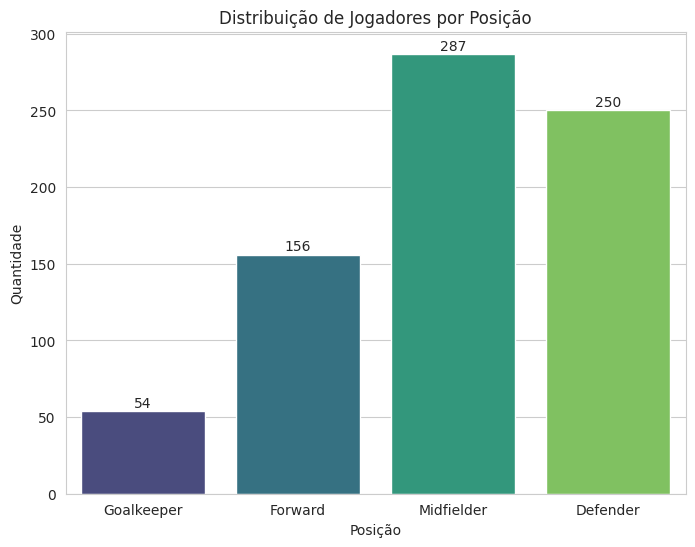

In [28]:
# Distribuição de jogadores por posição
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='position', hue='position', data=data, palette='viridis')

for bar in ax.patches:
    count = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
            str(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribuição de Jogadores por Posição')
plt.xlabel('Posição')
plt.ylabel('Quantidade')
plt.show()

### 4.3 Desempenho  por clube

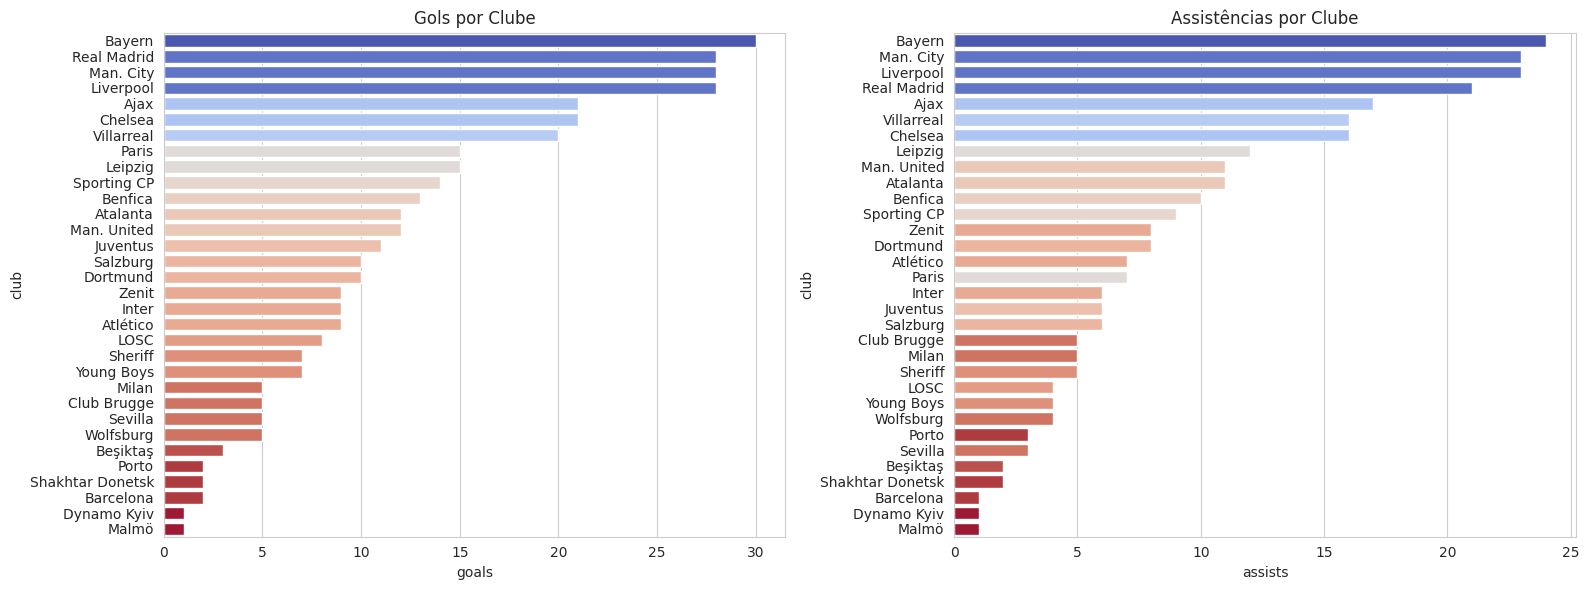

In [38]:
## Desempenho ofensivo por clube

club_performance = data.groupby('club')[['goals', 'assists']].sum().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='goals', hue='goals', y='club', legend=False, data=club_performance.sort_values('goals', ascending=False), palette='coolwarm_r', ax=axes[0])
sns.barplot(x='assists', hue='goals', y='club', legend=False, data=club_performance.sort_values('assists', ascending=False), palette='coolwarm_r', ax=axes[1])
axes[0].set_title('Gols por Clube')
axes[1].set_title('Assistências por Clube')

plt.tight_layout()
plt.show()

### 4.4 Proporção de Gols e Assistências por Clube

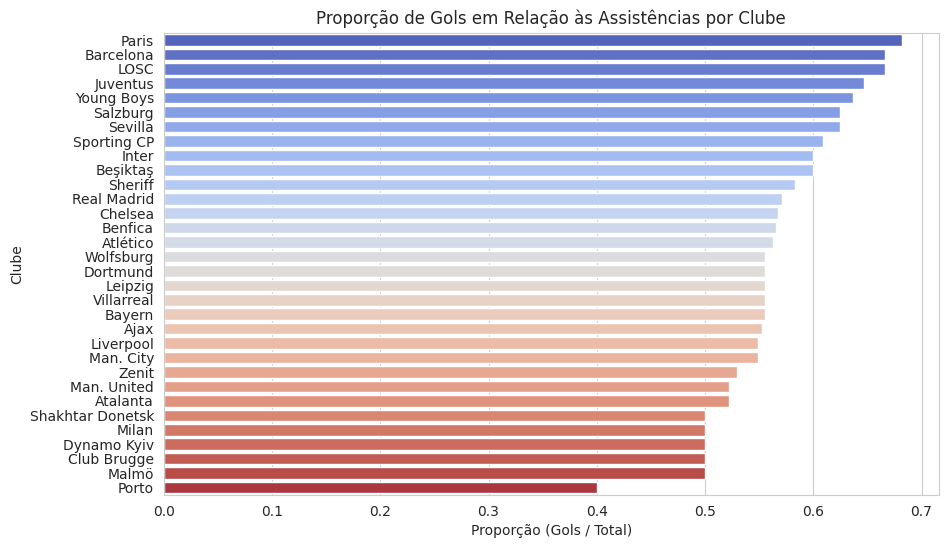

In [30]:
## Proporção de Gols e Assistências por Clube

club_performance['goal_assist_ratio'] = club_performance['goals'] / (club_performance['goals'] + club_performance['assists'])
plt.figure(figsize=(10, 6))
sns.barplot(x='goal_assist_ratio', hue='club', y='club', legend=False, data=club_performance.sort_values('goal_assist_ratio', ascending=False), palette='coolwarm')
plt.title('Proporção de Gols em Relação às Assistências por Clube')
plt.xlabel('Proporção (Gols / Total)')
plt.ylabel('Clube')
plt.show()

## 5. Análises avançadas

### 5.1 Jogadores com impacto ofensivo baixo, por posição (Exceto goleiros)

In [31]:
# Calcular o impacto ofensivo (gols + assistências por minuto jogado)
data['impact_score'] = (data['goals'] + data['assists']) / data['minutes_played']

# Filtrar jogadores com impacto ofensivo baixo, excluindo goleiros
weak_points = data[(data['impact_score'] < 0.01) & (data['position'] != 'Goalkeeper')]

# Ordenar os jogadores por impacto e pegar os 10 piores por posição
top_10_by_position = weak_points.sort_values('impact_score').groupby('position').head(10)

# Exibir jogadores por posição
positions = top_10_by_position['position'].unique()

for position in positions:
    print(f"\nJogadores com impacto ofensivo baixo na posição: {position}")
    print(top_10_by_position[top_10_by_position['position'] == position][['player_name', 'club']])


Jogadores com impacto ofensivo baixo na posição: Defender
    player_name         club
746     Zesiger   Young Boys
640      Rensch         Ajax
642      Kehrer        Paris
393    Vrsaljko     Atlético
643    Krugovoi        Zenit
389    Welinton     Beşiktaş
386      Lovren        Zenit
385       Orbán      Leipzig
384    Calabria        Milan
639     Esteves  Sporting CP

Jogadores com impacto ofensivo baixo na posição: Forward
       player_name         club
641  Ferran Torres    Man. City
644           Dost  Club Brugge
388      Evanilson        Porto
647        Martial  Man. United
379          Gómez      Sevilla
650       Mambimbi   Young Boys
436  Kenan Karaman     Beşiktaş
626      En-Nesyri      Sevilla
627       Supryaha  Dynamo Kyiv
399          Sowah  Club Brugge

Jogadores com impacto ofensivo baixo na posição: Midfielder
      player_name              club
390         Bruno           Sheriff
383       Paredes             Paris
648   Gagliardini             Inter
378    

### 5.2 Jogador mais consistente

In [32]:
## Jogador Mais Consistente
data['consistency_score'] = data['minutes_played'] / data['match_played']
consistent_player = data.loc[data['consistency_score'].idxmax()]
print("Jogador Mais Consistente:\n", consistent_player[['player_name', 'club', 'position', 'consistency_score']])

Jogador Mais Consistente:
 player_name             Courtois
club                 Real Madrid
position              Goalkeeper
consistency_score      94.615385
Name: 0, dtype: object


### 5.3 Distância Média Percorrida por Posição

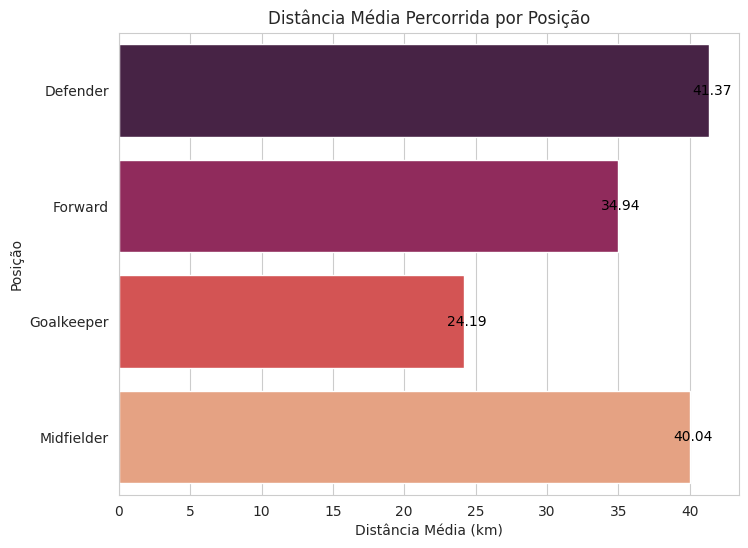

In [33]:
# Calcular a distância média percorrida por posição
avg_distance_by_position = data.groupby('position')['distance_covered'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='distance_covered', hue='position', y='position', data=avg_distance_by_position, palette='rocket')

# Adicionar os números nas barras
for p in ax.patches:
    ax.text(
        p.get_width() + 0.2,
        p.get_y() + p.get_height() / 2,
        f'{p.get_width():.2f}',
        ha='center', va='center', fontsize=10, color='black'
    )

# Configurações do gráfico
plt.title('Distância Média Percorrida por Posição')
plt.xlabel('Distância Média (km)')
plt.ylabel('Posição')
plt.show()


### 5.4 Melhor Jogador por Posição



In [34]:
## Melhor Jogador por Posição
data['player_score'] = (data['goals'] * 5) + (data['assists'] * 3) + (data['distance_covered'] * 0.5)

best_players = data.loc[data.groupby('position')['player_score'].idxmax()]
print("Melhor Jogador por Posição:\n", best_players[['player_name', 'club', 'position', 'player_score']])

Melhor Jogador por Posição:
        player_name         club    position  player_score
69    João Cancelo    Man. City    Defender         69.15
2          Benzema  Real Madrid     Forward        138.75
25  Alisson Becker    Liverpool  Goalkeeper         34.40
59          Mahrez    Man. City  Midfielder        101.05


### 5.5 Melhor Equipe Ofensiva

In [35]:
most_offensive_team = club_performance.loc[club_performance['goals'].idxmax()]
print("Melhor Equipe Ofensiva:\n", most_offensive_team)

Melhor Equipe Ofensiva:
 club                   Bayern
goals                      30
assists                    24
goal_assist_ratio    0.555556
Name: 4, dtype: object


### 5.6 Mapa de Calor de Desempenho

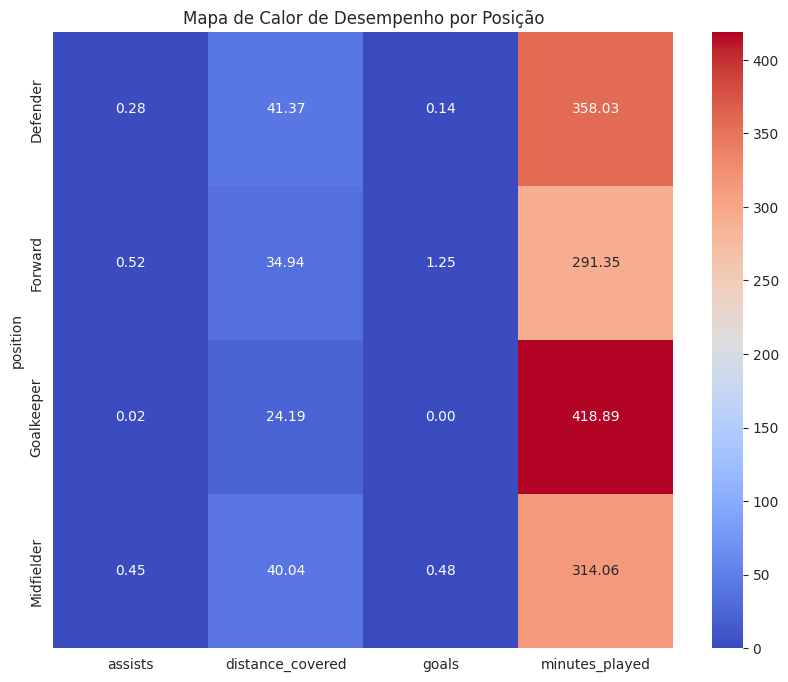

In [36]:
heatmap_data = data.pivot_table(index='position', values=['goals', 'assists', 'distance_covered', 'minutes_played'], aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor de Desempenho por Posição')
plt.show()

## 6 Jogador da temporada

In [37]:
## Jogador da Temporada

player_of_the_season = data.loc[data['player_score'].idxmax()]
print("Jogador da Temporada:\n", player_of_the_season[['player_name', 'club', 'position', 'player_score']])

Jogador da Temporada:
 player_name         Benzema
club            Real Madrid
position            Forward
player_score         138.75
Name: 2, dtype: object
